In [34]:
from keras.models import load_model
from keras.metrics import CategoricalAccuracy
from build_train_set import buildTrainSet, makePvBin
from post_transcription import returnPvLabels, removePvSilence
from load_midi_set import importMidiFiles
from rule_based_qbh import ruleBasedQBH
from dynamic_time_warping import songRanking, songRankingBaseline, meanReciprocalRank
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import os

cur_path = os.path.abspath(os.path.dirname(''))

## Initialize Dataset

In [10]:
x_train, y_train, label_train, x_test, y_test, label_test, x_tune, y_tune, label_tune = buildTrainSet()
midi, song_list = importMidiFiles()

## 1. Using LSTM

In [11]:
model = load_model('../ext/model_lstm.h5')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 250, 256)          264192    
                                                                 
 lstm_6 (LSTM)               (None, 250, 256)          525312    
                                                                 
 lstm_7 (LSTM)               (None, 250, 256)          525312    
                                                                 
 lstm_8 (LSTM)               (None, 250, 256)          525312    
                                                                 
 dropout_2 (Dropout)         (None, 250, 256)          0         
                                                                 
 dense_2 (Dense)             (None, 250, 13)           3341      
                                                                 
Total params: 1,843,469
Trainable params: 1,843,469
No

In [12]:
y_pred = model.predict(x_test)
print('shape:', y_pred.shape)

13/13 [==============================] - 15s 940ms/step
shape: (396, 250, 13)


In [13]:
acc_lstm = CategoricalAccuracy()
acc_lstm.update_state(y_test, y_pred)
print('LSTM accuracy:', acc_lstm.result().numpy())

LSTM accuracy: 0.8601111


In [15]:
yp_labels = removePvSilence(returnPvLabels(y_pred))
ya_labels = removePvSilence(returnPvLabels(y_test))

print('len:', len(yp_labels))

len: 396


In [20]:
# Similarity Matching
ranks = []

for i in range (len(yp_labels)):
    print('Hum ' + str(i+1) + '/' + str(len(yp_labels)))
    ranks.append(songRanking(yp_labels[i], midi))

    np.save((os.path.join(cur_path, '../ext/ranks')), ranks)

Hum 1/396
Hum 2/396
Hum 3/396
Hum 4/396
Hum 5/396
Hum 6/396
Hum 7/396
Hum 8/396
Hum 9/396
Hum 10/396
Hum 11/396
Hum 12/396
Hum 13/396
Hum 14/396
Hum 15/396
Hum 16/396
Hum 17/396
Hum 18/396
Hum 19/396
Hum 20/396
Hum 21/396
Hum 22/396
Hum 23/396
Hum 24/396
Hum 25/396
Hum 26/396
Hum 27/396
Hum 28/396
Hum 29/396
Hum 30/396
Hum 31/396
Hum 32/396
Hum 33/396
Hum 34/396
Hum 35/396
Hum 36/396
Hum 37/396
Hum 38/396
Hum 39/396
Hum 40/396
Hum 41/396
Hum 42/396
Hum 43/396
Hum 44/396
Hum 45/396
Hum 46/396
Hum 47/396
Hum 48/396
Hum 49/396
Hum 50/396
Hum 51/396
Hum 52/396
Hum 53/396
Hum 54/396
Hum 55/396
Hum 56/396
Hum 57/396
Hum 58/396
Hum 59/396
Hum 60/396
Hum 61/396
Hum 62/396
Hum 63/396
Hum 64/396
Hum 65/396
Hum 66/396
Hum 67/396
Hum 68/396
Hum 69/396
Hum 70/396
Hum 71/396
Hum 72/396
Hum 73/396
Hum 74/396
Hum 75/396
Hum 76/396
Hum 77/396
Hum 78/396
Hum 79/396
Hum 80/396
Hum 81/396
Hum 82/396
Hum 83/396
Hum 84/396
Hum 85/396
Hum 86/396
Hum 87/396
Hum 88/396
Hum 89/396
Hum 90/396
Hum 91/396
Hum 92/3

In [38]:
rank_list = []
for i in range (len(ranks)):
    print('----- ' + str(i+1) + '/' + str(len(ranks)) + ' -----')
    print('Label        :', label_test[i])
    print('Ranking      :', ranks[i])
    print('Posisi label : '+ str(ranks[i].index(label_test[i]) + 1) + '/' + str(len(ranks[i])))
    rank_list.append(ranks[i].index(label_test[i]) + 1)

----- 1/396 -----
Label        : 34
Ranking      : [34.0, 22.0, 32.0, 20.0, 1.0, 28.0, 7.0, 13.0, 43.0, 24.0, 0.0, 33.0, 9.0, 45.0, 16.0, 27.0, 5.0, 23.0, 38.0, 10.0, 37.0, 36.0, 39.0, 42.0, 8.0, 3.0, 6.0, 19.0, 47.0, 41.0, 15.0, 26.0, 30.0, 46.0, 12.0, 44.0, 4.0, 35.0, 25.0, 31.0, 2.0, 17.0, 40.0, 18.0, 21.0, 29.0, 11.0, 14.0]
Posisi label : 1/48
----- 2/396 -----
Label        : 37
Ranking      : [37.0, 27.0, 17.0, 41.0, 38.0, 11.0, 18.0, 32.0, 8.0, 9.0, 24.0, 28.0, 1.0, 19.0, 42.0, 22.0, 0.0, 25.0, 45.0, 44.0, 30.0, 34.0, 33.0, 12.0, 46.0, 21.0, 47.0, 20.0, 10.0, 5.0, 29.0, 40.0, 4.0, 6.0, 43.0, 2.0, 39.0, 31.0, 16.0, 7.0, 36.0, 23.0, 15.0, 13.0, 26.0, 35.0, 3.0, 14.0]
Posisi label : 1/48
----- 3/396 -----
Label        : 40
Ranking      : [7.0, 41.0, 0.0, 17.0, 30.0, 27.0, 39.0, 19.0, 8.0, 9.0, 32.0, 34.0, 46.0, 6.0, 5.0, 16.0, 24.0, 13.0, 42.0, 21.0, 44.0, 33.0, 1.0, 18.0, 45.0, 10.0, 20.0, 47.0, 3.0, 22.0, 25.0, 38.0, 26.0, 28.0, 15.0, 29.0, 4.0, 37.0, 23.0, 31.0, 40.0, 43.0, 36.0,

In [47]:
n = 5
print('Top 5 songs:')
for i in range(5):
    print(str(i+1) + '. ' + song_list[int(ranks[n][i])])

print('\nActual:', song_list[label_test[n]])

Top 5 songs:
1. Song 43
2. Song 44
3. Brother John (Are you sleeping?)
4. six little ducks
5. humpty dumpty

Actual: Song 43


In [24]:
print(rank_list)

[1, 1, 41, 1, 13, 1, 1, 8, 8, 42, 3, 5, 16, 1, 45, 4, 28, 7, 10, 1, 5, 11, 1, 1, 1, 1, 1, 27, 5, 16, 48, 41, 1, 1, 1, 39, 36, 5, 37, 1, 1, 40, 1, 14, 1, 42, 11, 1, 25, 33, 1, 28, 3, 1, 23, 15, 2, 3, 11, 19, 26, 41, 1, 13, 40, 30, 42, 7, 1, 1, 27, 5, 2, 2, 1, 11, 1, 1, 1, 3, 1, 1, 2, 1, 3, 33, 4, 5, 20, 18, 1, 45, 4, 1, 2, 4, 1, 39, 7, 1, 1, 1, 1, 29, 13, 26, 1, 27, 43, 3, 1, 1, 1, 5, 32, 29, 18, 19, 26, 1, 1, 29, 1, 1, 2, 38, 27, 1, 1, 1, 1, 8, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 30, 3, 1, 1, 46, 22, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 3, 2, 1, 2, 6, 1, 1, 1, 1, 1, 36, 12, 1, 1, 35, 1, 1, 12, 1, 1, 22, 5, 34, 1, 39, 1, 2, 1, 1, 16, 32, 1, 30, 3, 1, 1, 9, 1, 16, 12, 39, 1, 1, 5, 27, 1, 27, 4, 1, 5, 1, 10, 37, 1, 8, 37, 7, 1, 16, 1, 1, 1, 10, 14, 1, 8, 1, 2, 13, 1, 13, 46, 13, 46, 2, 31, 1, 1, 22, 40, 5, 3, 23, 1, 37, 4, 1, 1, 28, 1, 1, 46, 15, 2, 1, 43, 32, 1, 1, 6, 1, 35, 43, 15, 2, 6, 7, 1, 28, 2, 27, 41, 32, 18, 10, 30, 33, 4, 3, 4, 40, 3, 27, 1, 28, 43, 2, 8, 6, 1, 2, 1, 1, 4

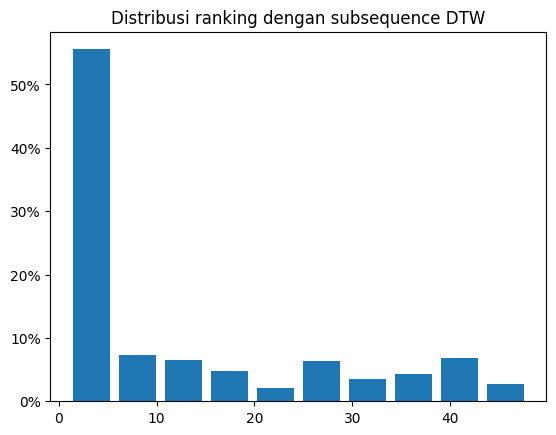

In [35]:
plt.hist(rank_list, 10, rwidth=0.8, weights=np.ones(len(rank_list))/len(rank_list))
plt.title('Distribusi ranking dengan subsequence DTW')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
plt.show()

In [36]:
mrr = meanReciprocalRank(ranks, label_test)
print(mrr)

0.4836252091546631


## 2. Using RBS

In [4]:
x_rbs = np.reshape(x_test, (len(x_test), 250))
print(x_rbs.shape)

(396, 250)


In [54]:
label_rbs = ruleBasedQBH(x_rbs)
print((len(label_rbs), len(label_rbs[0])))

(396, 250)


In [57]:
bin_rbs = makePvBin(label_rbs)

acc = CategoricalAccuracy()
acc.update_state(y_test, bin_rbs)
print('RBS accuracy:', acc.result().numpy())

RBS accuracy: 0.22413132


In [8]:
acc = CategoricalAccuracy()
acc.update_state(y_test, bin_rbs)

acc.result().numpy()

0.22413132

In [16]:
rp_labels = removePvSilence(label_rbs)
ra_labels = removePvSilence(returnPvLabels(y_test))

print('len:', len(rp_labels))

len: 396


In [17]:
# Similarity Matching
ranks_rbs = []

for i in range (len(label_rbs)):
    print('Hum ' + str(i+1) + '/' + str(len(label_rbs)))
    ranks_rbs.append(songRankingBaseline(label_rbs[i], midi))

    np.save((os.path.join(cur_path, '../ext/ranks_rbs')), ranks_rbs)

Hum 1/396
Hum 2/396
Hum 3/396
Hum 4/396
Hum 5/396
Hum 6/396
Hum 7/396
Hum 8/396
Hum 9/396
Hum 10/396
Hum 11/396
Hum 12/396
Hum 13/396
Hum 14/396
Hum 15/396
Hum 16/396
Hum 17/396
Hum 18/396
Hum 19/396
Hum 20/396
Hum 21/396
Hum 22/396
Hum 23/396
Hum 24/396
Hum 25/396
Hum 26/396
Hum 27/396
Hum 28/396
Hum 29/396
Hum 30/396
Hum 31/396
Hum 32/396
Hum 33/396
Hum 34/396
Hum 35/396
Hum 36/396
Hum 37/396
Hum 38/396
Hum 39/396
Hum 40/396
Hum 41/396
Hum 42/396
Hum 43/396
Hum 44/396
Hum 45/396
Hum 46/396
Hum 47/396
Hum 48/396
Hum 49/396
Hum 50/396
Hum 51/396
Hum 52/396
Hum 53/396
Hum 54/396
Hum 55/396
Hum 56/396
Hum 57/396
Hum 58/396
Hum 59/396
Hum 60/396
Hum 61/396
Hum 62/396
Hum 63/396
Hum 64/396
Hum 65/396
Hum 66/396
Hum 67/396
Hum 68/396
Hum 69/396
Hum 70/396
Hum 71/396
Hum 72/396
Hum 73/396
Hum 74/396
Hum 75/396
Hum 76/396
Hum 77/396
Hum 78/396
Hum 79/396
Hum 80/396
Hum 81/396
Hum 82/396
Hum 83/396
Hum 84/396
Hum 85/396
Hum 86/396
Hum 87/396
Hum 88/396
Hum 89/396
Hum 90/396
Hum 91/396
Hum 92/3

In [18]:

for i in range (len(label_rbs)):
    print('----- ' + str(i+1) + '/' + str(len(ranks_rbs)) + ' -----')
    print('Label        :', label_test[i])
    print('Ranking      :', ranks_rbs[i])
    print('Posisi label : '+ str(ranks_rbs[i].index(label_test[i]) + 1) + '/' + str(len(ranks_rbs[i])))

----- 1/396 -----
Label        : 34
Ranking      : [29.0, 11.0, 15.0, 40.0, 2.0, 14.0, 6.0, 30.0, 19.0, 35.0, 3.0, 4.0, 10.0, 34.0, 12.0, 7.0, 42.0, 26.0, 21.0, 8.0, 44.0, 9.0, 39.0, 41.0, 43.0, 13.0, 17.0, 46.0, 0.0, 28.0, 47.0, 5.0, 23.0, 18.0, 16.0, 38.0, 20.0, 36.0, 1.0, 32.0, 33.0, 24.0, 37.0, 31.0, 25.0, 45.0, 27.0, 22.0]
Posisi label : 14/48
----- 2/396 -----
Label        : 37
Ranking      : [14.0, 11.0, 15.0, 2.0, 19.0, 35.0, 29.0, 3.0, 10.0, 42.0, 6.0, 40.0, 7.0, 21.0, 30.0, 12.0, 34.0, 44.0, 8.0, 26.0, 4.0, 17.0, 9.0, 39.0, 41.0, 43.0, 0.0, 13.0, 36.0, 28.0, 46.0, 47.0, 16.0, 23.0, 5.0, 38.0, 20.0, 32.0, 1.0, 24.0, 33.0, 18.0, 37.0, 31.0, 25.0, 45.0, 27.0, 22.0]
Posisi label : 43/48
----- 3/396 -----
Label        : 40
Ranking      : [29.0, 15.0, 2.0, 40.0, 11.0, 14.0, 19.0, 6.0, 35.0, 4.0, 10.0, 34.0, 12.0, 7.0, 21.0, 8.0, 26.0, 30.0, 44.0, 3.0, 9.0, 42.0, 39.0, 17.0, 13.0, 43.0, 46.0, 28.0, 0.0, 41.0, 5.0, 47.0, 23.0, 20.0, 16.0, 36.0, 38.0, 1.0, 32.0, 18.0, 33.0, 24.0, 37.0

In [19]:
mrr_rbs = meanReciprocalRank(ranks_rbs, label_test)
print(mrr_rbs)

0.12203611871479325


In [26]:
for i in range (len(yp_labels)):
    print('----- ' + str(i+1) + '/' + str(len(yp_labels)) + ' -----')
    print('LSTM  :', yp_labels[i])
    print('RBS   :', rp_labels[i])
    print('Actual:', ya_labels[i])
    

----- 1/396 -----
LSTM  : [10, 11, 11, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 8, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 6, 6, 6, 6, 6, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 0, 0, 11, 10, 10, 9, 10, 10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 11, 0, 0, 0, 0, 0, 0, 11, 11, 10, 10, 9, 9, 9, 9, 9, 9, 10, 10, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 9, 8, 9, 9, 8, 8, 8, 8, 7, 7, 7, 6, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 3, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 4]
RBS   : [11, 11, 11, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 8, 7, 9, 9, 10, 10, 10, 9, 9, 10, 10, 10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 0, 11, 11, 10, 9, 9

In [19]:
print(x_rbs[0])
print(label_rbs[0])

[206.96189851 210.20158889 213.03364939 214.57609956 221.04342736
 228.71500065 237.85138219 243.2657681  242.65414118 241.72914663
 244.18316066 246.68887483 247.77260585 249.80033311 251.45098215
 252.50013795 252.21897972 249.97733872 249.34305841 248.86929056
 247.78743421 246.2952983  245.84573848 247.60077163 247.72017424
 246.43201555 247.55788289 248.70246293 248.08636722 244.34904025
   0.           0.         191.78863666 176.30397181 165.89704765
 181.11736834 188.49246813 190.5078577  190.93111845 192.35461195
 189.32051198 188.9190116  192.97610392 195.53643529 193.21118725
 192.14812061 189.64471782 189.84622028 193.79255678 195.89872163
 196.06688748 195.10010217 192.20968255 193.27546138 193.02536673
 191.61891559 189.6078442  191.95569295 192.61859085 191.47005549
 191.12190043 191.58312181 193.84541554 192.07050136   0.
   0.           0.           0.           0.         162.81556993
 161.01687828 160.75607121 160.51155685 161.48852237 160.45802685
 161.88127084 165.